In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, linregress

# Punto 3.7

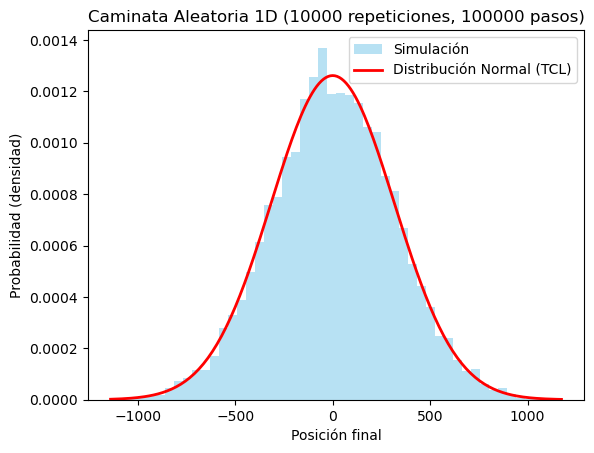

In [2]:
def caminata_aleatoria(N, repeticiones):
   
    pasos = np.random.choice([-1, 1], size=(repeticiones, N))
   
    posiciones_finales = np.sum(pasos, axis=1)
    return posiciones_finales


N = 100000          
repeticiones = 10000  

posiciones = caminata_aleatoria(N, repeticiones)


plt.hist(posiciones, bins=50, density=True, alpha=0.6, color='skyblue', label="Simulación")


mu = 0
sigma = np.sqrt(N)
x = np.linspace(min(posiciones), max(posiciones), 200)
pdf = norm.pdf(x, mu, sigma)

plt.plot(x, pdf, 'r-', lw=2, label="Distribución Normal (TCL)")
plt.title(f"Caminata Aleatoria 1D ({repeticiones} repeticiones, {N} pasos)")
plt.xlabel("Posición final")
plt.ylabel("Probabilidad (densidad)")
plt.legend()
plt.show()


# Punto 3.8

Pendiente ajustada: 1.0011
Coeficiente de correlación R^2: 0.999910
Constante de difusión D ≈ 0.5005
Valores de N, N =[ 1412  7136  7139  9704  9742 18096 19458 22863 33975 41762]


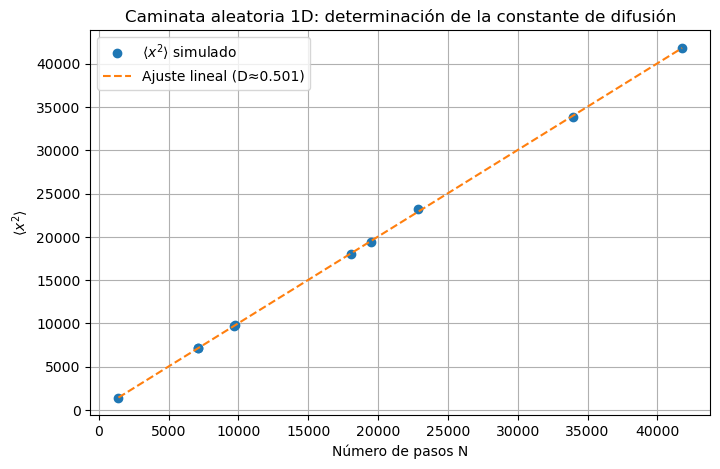

In [3]:
np.random.seed(42)

# valores aleatorios únicos entre 10 y 100000
valores_N = np.random.choice(range(10, 100000), size=10, replace=False)
valores_N = np.sort(valores_N)


repeticiones = 50000


promedios_x2 = []

for N in valores_N:
    resultados = caminata_aleatoria(N, repeticiones)
    promedio_x2 = np.mean(resultados**2)   # <x^2>
    promedios_x2.append(promedio_x2)


slope, intercept, r_value, p_value, std_err = linregress(valores_N, promedios_x2)

# Dado que: <x^2> = 2DN  →  D = slope/2
D = slope / 2

print(f"Pendiente ajustada: {slope:.4f}")
print(f"Coeficiente de correlación R^2: {r_value**2:.6f}")
print(f"Constante de difusión D ≈ {D:.4f}")
print(f"Valores de N, N ={valores_N}")

plt.figure(figsize=(8,5))
plt.plot(valores_N, promedios_x2, 'o', label=r'$\langle x^2 \rangle$ simulado')
plt.plot(valores_N, slope*valores_N + intercept, '--', 
         label=f"Ajuste lineal (D≈{D:.3f})")
plt.xlabel("Número de pasos N")
plt.ylabel(r'$\langle x^2 \rangle$')
plt.title("Caminata aleatoria 1D: determinación de la constante de difusión")
plt.legend()
plt.grid(True)
plt.show()
